# Steps Involved : Data Exploration, Model Fitting, Best Model Selection, Inference

# Data Exploration

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data1 = pd.read_excel('SkewBridge_2Col_Database_v0.xlsx', sheet_name='COL')
data1.head()

,Sim,EQ,Sa10,Eqdir,fc,fy,Lm,Ls2Lm,Wd,Lc,...,Nspan,EDP,Unnamed: 28,COL,ABP,ABA,ABT,UST,BRG,Unnamed: 35
0,1,1,-1.768922,1,3.397886,6.134044,3.316626,-0.702407,2.990044,2.147912,...,2,-0.687105,NaN,-0.687105,3.149311,3.460221,3.504325,4.102875,3.853588,1
1,2,2,-0.849313,1,3.497558,6.198634,4.099415,-0.348695,2.777936,1.724100,...,2,2.862372,NaN,2.862372,2.464704,3.460346,5.177223,4.515202,5.096568,2
2,3,3,-0.810957,2,3.465500,6.177613,3.953637,-0.045222,2.989842,2.075455,...,2,1.460567,NaN,1.460567,3.983264,3.785689,4.930509,4.819233,5.018537,3
3,4,4,-1.014436,2,3.335612,6.094850,3.933913,-0.065393,2.978069,1.665033,...,2,1.544707,NaN,1.544707,2.873734,3.594514,4.879311,4.414893,4.691440,4
4,5,5,-1.013933,2,3.611960,6.275516,3.282610,-0.737920,2.806264,1.967175,...,2,0.729865,NaN,0.729865,2.812110,3.523268,4.527609,3.673715,3.878714,5


In [2]:
data1.columns   # display column names

Index(['Sim', 'EQ', 'Sa10', 'Eqdir', 'fc', 'fy', 'Lm', 'Ls2Lm', 'Wd', 'Lc',
       'ρc', 'sh', 'KfT', 'Akf', 'KfrT', 'Ha', 'Ka', 'Soil', 'Kb', 'COF', 'ζ',
       'mass', 'ΔgL', 'ΔgT', 'Ash', 'α', 'Nspan', 'EDP', 'Unnamed: 28', 'COL',
       'ABP', 'ABA', 'ABT', 'UST', 'BRG', 'Unnamed: 35'],
      dtype='object')

In [3]:
data=data1.loc[:, 'Sa10':'EDP']
data.head()

,Sa10,Eqdir,fc,fy,Lm,Ls2Lm,Wd,Lc,ρc,sh,...,Kb,COF,ζ,mass,ΔgL,ΔgT,Ash,α,Nspan,EDP
0,-1.768922,1,3.397886,6.134044,3.316626,-0.702407,2.990044,2.147912,-3.582916,4.333361,...,0.079808,-0.818986,-2.953636,-0.036358,2.429231,1.459322,-0.076926,-0.015511,2,-0.687105
1,-0.849313,1,3.497558,6.198634,4.099415,-0.348695,2.777936,1.724100,-4.461487,4.566129,...,-0.417493,-1.107551,-2.949113,0.111623,2.986170,2.866508,0.161213,-0.739437,2,2.862372
2,-0.810957,2,3.465500,6.177613,3.953637,-0.045222,2.989842,2.075455,-3.665158,4.333361,...,-0.396074,-1.093246,-2.816803,0.114640,3.699512,3.543883,0.049158,-0.567427,2,1.460567
3,-1.014436,2,3.335612,6.094850,3.933913,-0.065393,2.978069,1.665033,-3.517404,4.333361,...,-1.180617,-1.827693,-3.180276,0.047557,3.428410,3.397446,-0.111701,-1.305582,2,1.544707
4,-1.013933,2,3.611960,6.275516,3.282610,-0.737920,2.806264,1.967175,-3.874700,4.333361,...,-1.111812,-1.736851,-3.035035,-0.027294,3.744077,3.559005,-0.198623,-2.010922,2,0.729865


In [4]:
print(data.shape)

(949, 26)


# Checking the data types, If string exists it should be converted into numerical values

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sa10    949 non-null    float64
 1   Eqdir   949 non-null    int64  
 2   fc      949 non-null    float64
 3   fy      949 non-null    float64
 4   Lm      949 non-null    float64
 5   Ls2Lm   949 non-null    float64
 6   Wd      949 non-null    float64
 7   Lc      949 non-null    float64
 8   ρc      949 non-null    float64
 9   sh      949 non-null    float64
 10  KfT     949 non-null    float64
 11  Akf     949 non-null    float64
 12  KfrT    949 non-null    float64
 13  Ha      949 non-null    float64
 14  Ka      949 non-null    float64
 15  Soil    949 non-null    int64  
 16  Kb      949 non-null    float64
 17  COF     949 non-null    float64
 18  ζ       949 non-null    float64
 19  mass    949 non-null    float64
 20  ΔgL     949 non-null    float64
 21  ΔgT     949 non-null    float64
 22  As

In [6]:
#checking missing values by column
data.isnull().sum()

Sa10     0
Eqdir    0
fc       0
fy       0
Lm       0
Ls2Lm    0
Wd       0
Lc       0
ρc       0
sh       0
KfT      0
Akf      0
KfrT     0
Ha       0
Ka       0
Soil     0
Kb       0
COF      0
ζ        0
mass     0
ΔgL      0
ΔgT      0
Ash      0
α        0
Nspan    0
EDP      0
dtype: int64

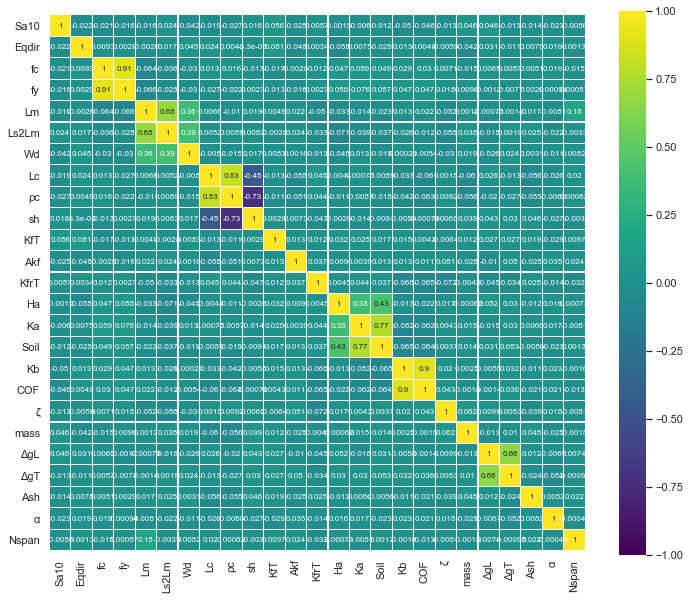

In [7]:
corr = data.drop('EDP', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

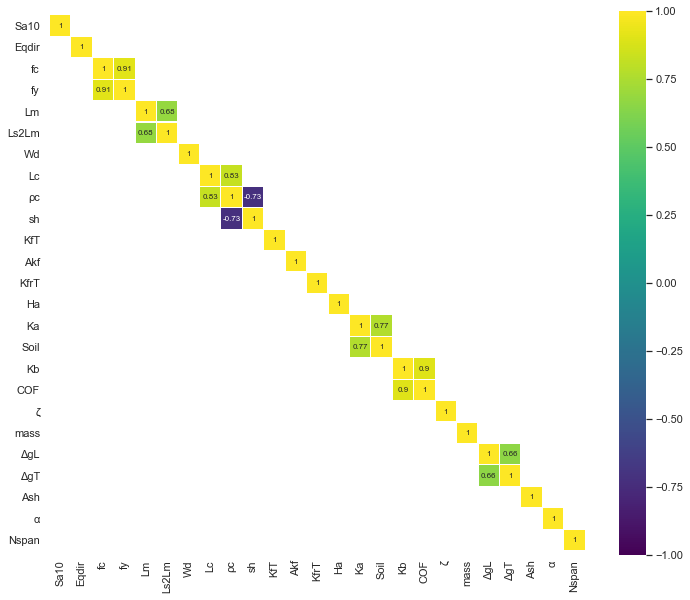

In [8]:
# Plottinf correlation above or below 0.5
corr = data.drop('EDP', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [9]:
features = list(data.columns.values)
print(features)

['Sa10', 'Eqdir', 'fc', 'fy', 'Lm', 'Ls2Lm', 'Wd', 'Lc', 'ρc', 'sh', 'KfT', 'Akf', 'KfrT', 'Ha', 'Ka', 'Soil', 'Kb', 'COF', 'ζ', 'mass', 'ΔgL', 'ΔgT', 'Ash', 'α', 'Nspan', 'EDP']


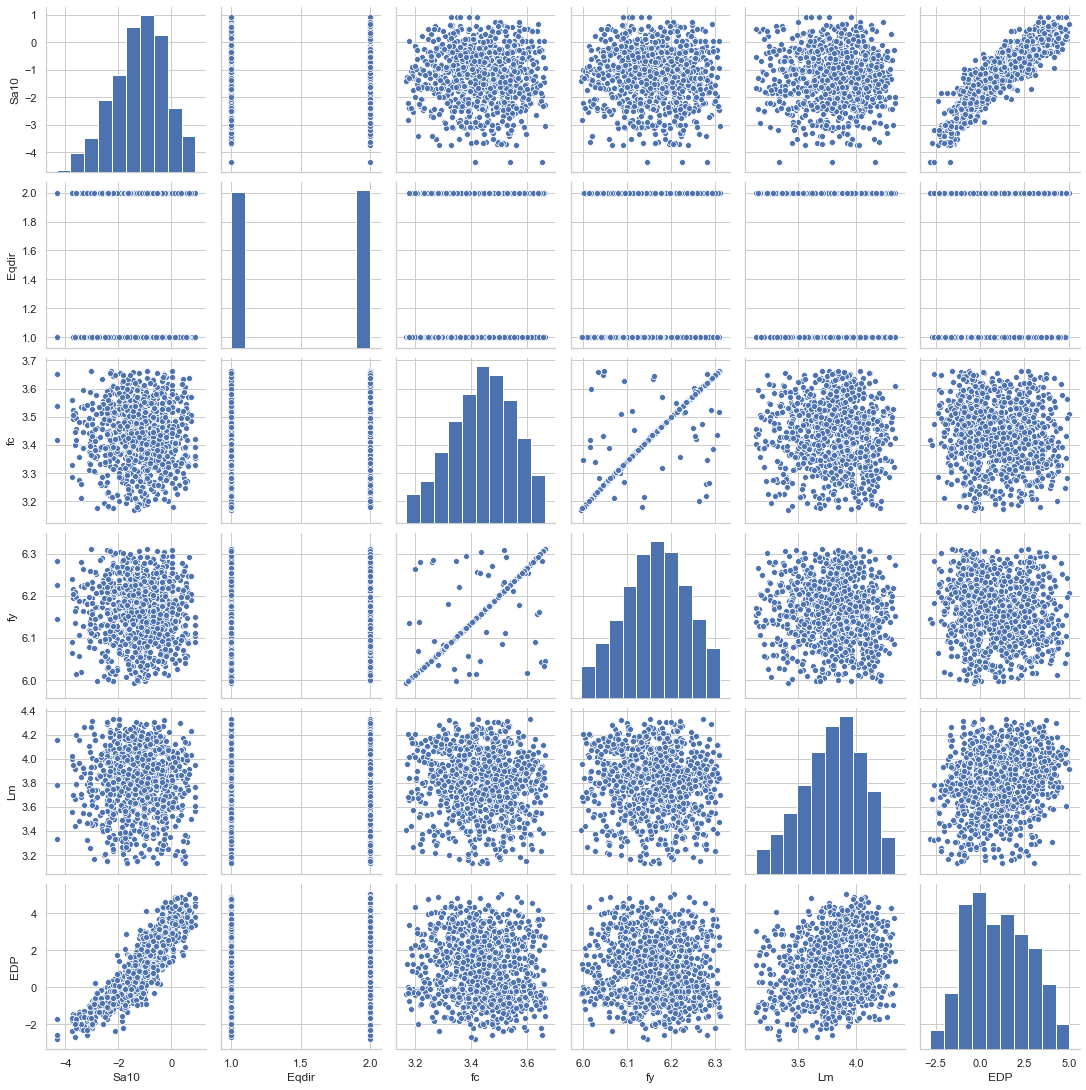

In [10]:
import seaborn as sns
quantitative_features_list1 = ['Sa10', 'Eqdir', 'fc', 'fy', 'Lm', 'EDP']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data)

plt.savefig('seaborn_plot1.eps',format='eps', dpi=1000)

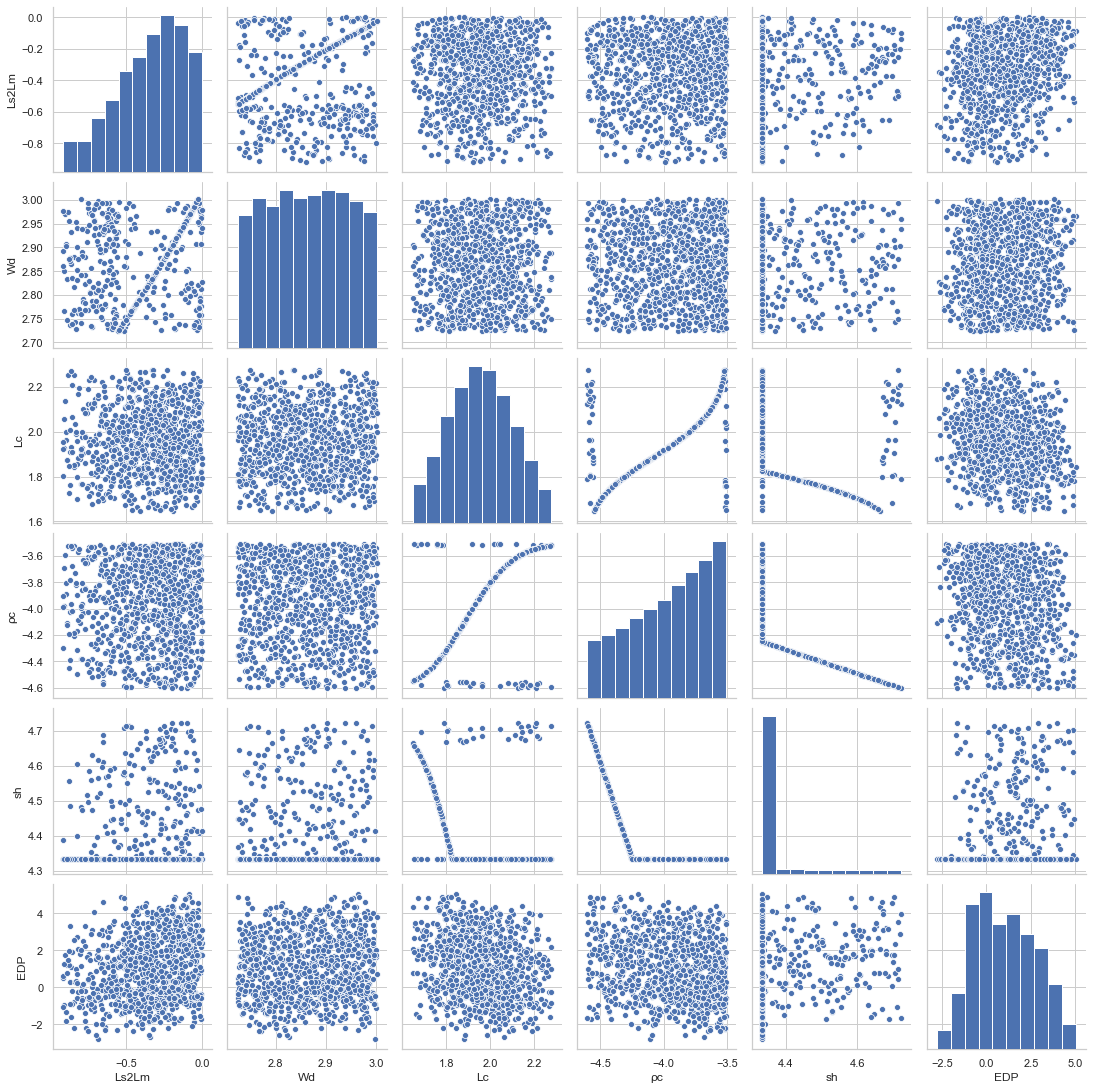

In [11]:
import seaborn as sns
quantitative_features_list1 = ['Ls2Lm', 'Wd', 'Lc', 'ρc', 'sh', 'EDP']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data)

plt.savefig('seaborn_plot2.eps',format='eps', dpi=1000)

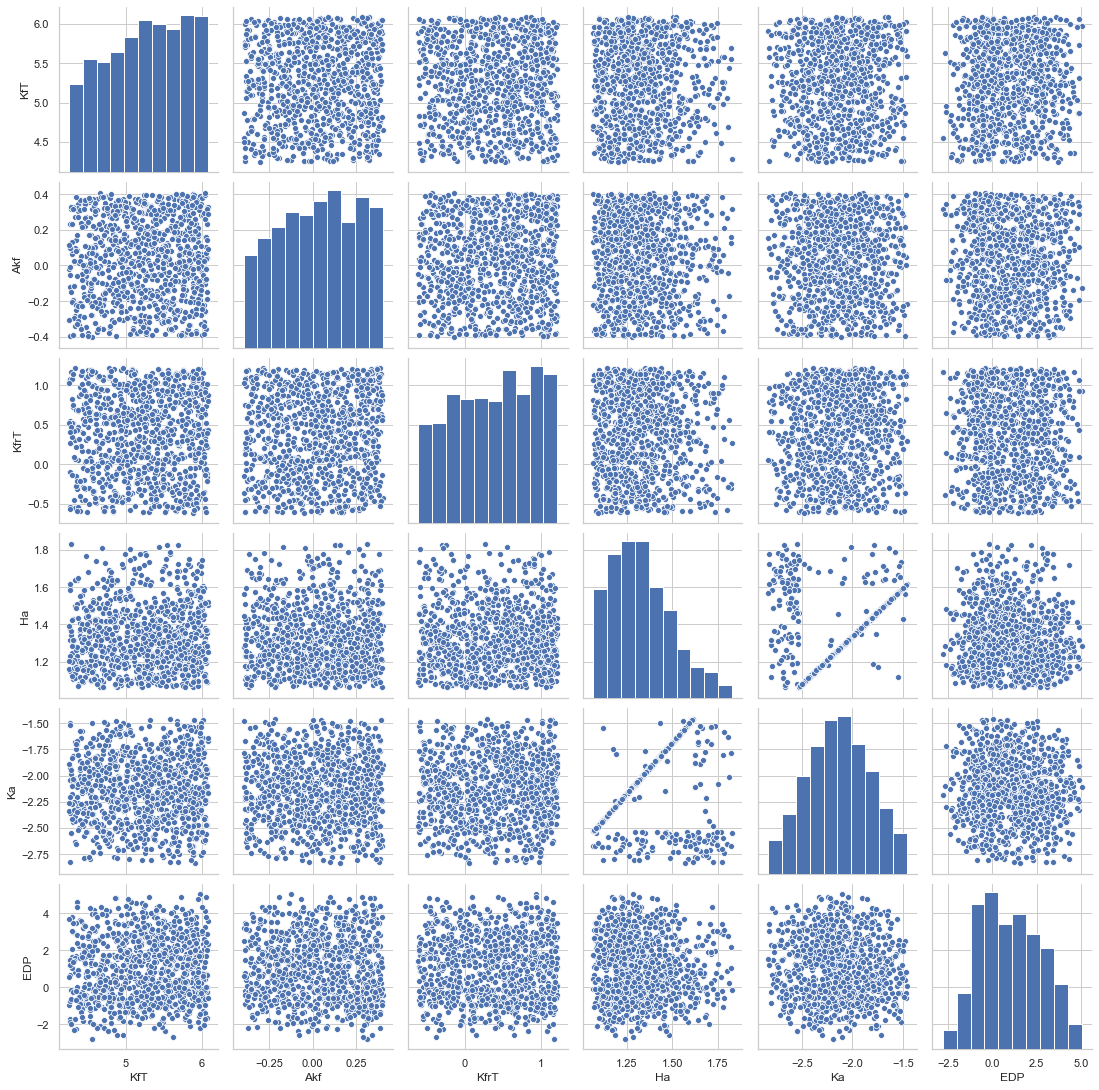

In [12]:
import seaborn as sns
quantitative_features_list1 = ['KfT', 'Akf', 'KfrT', 'Ha', 'Ka', 'EDP']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data)

plt.savefig('seaborn_plot3.eps',format='eps', dpi=1000)

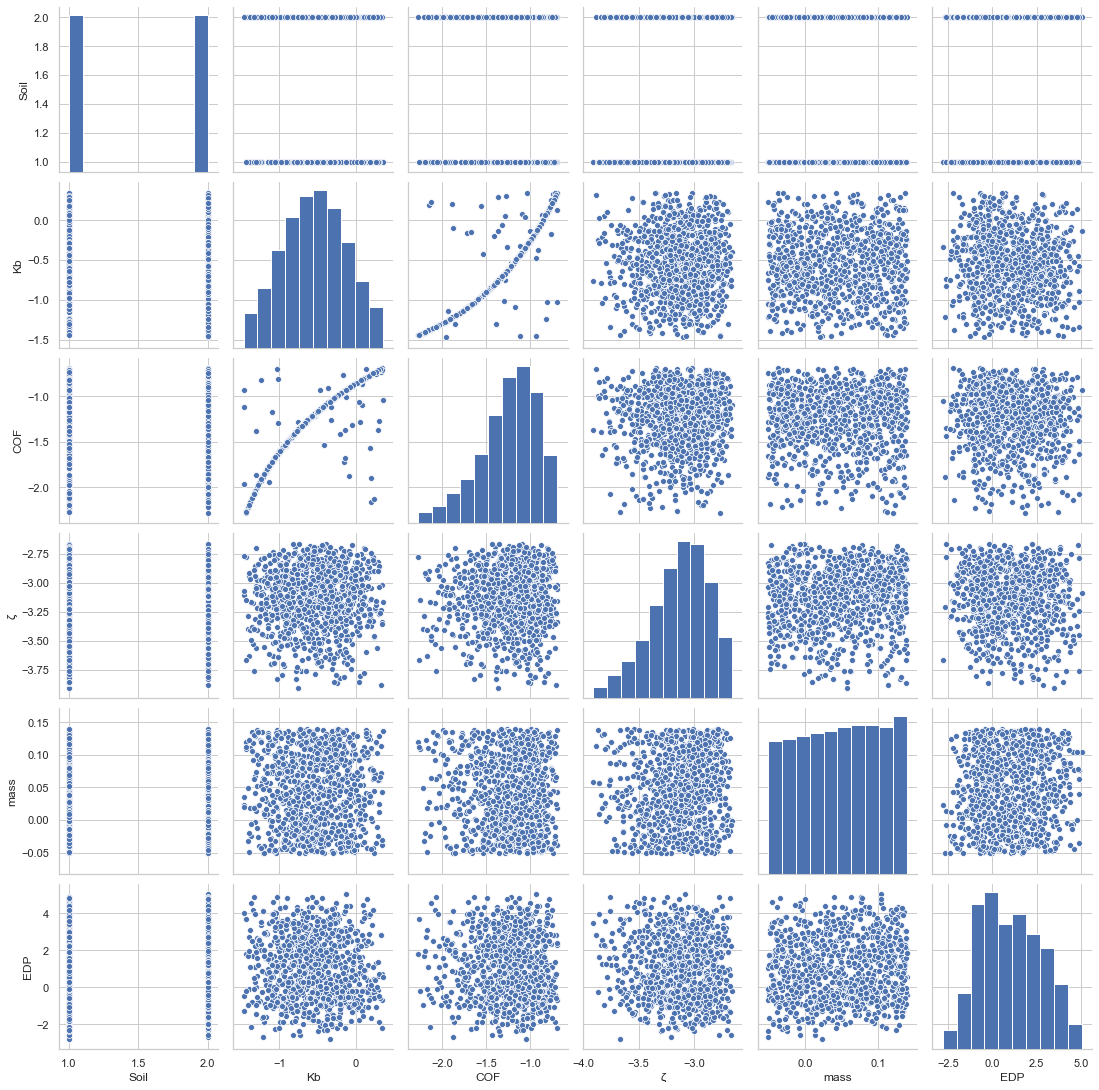

In [13]:
import seaborn as sns
quantitative_features_list1 = ['Soil', 'Kb', 'COF', 'ζ', 'mass', 'EDP']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data)

plt.savefig('seaborn_plot4.eps',format='eps', dpi=1000)

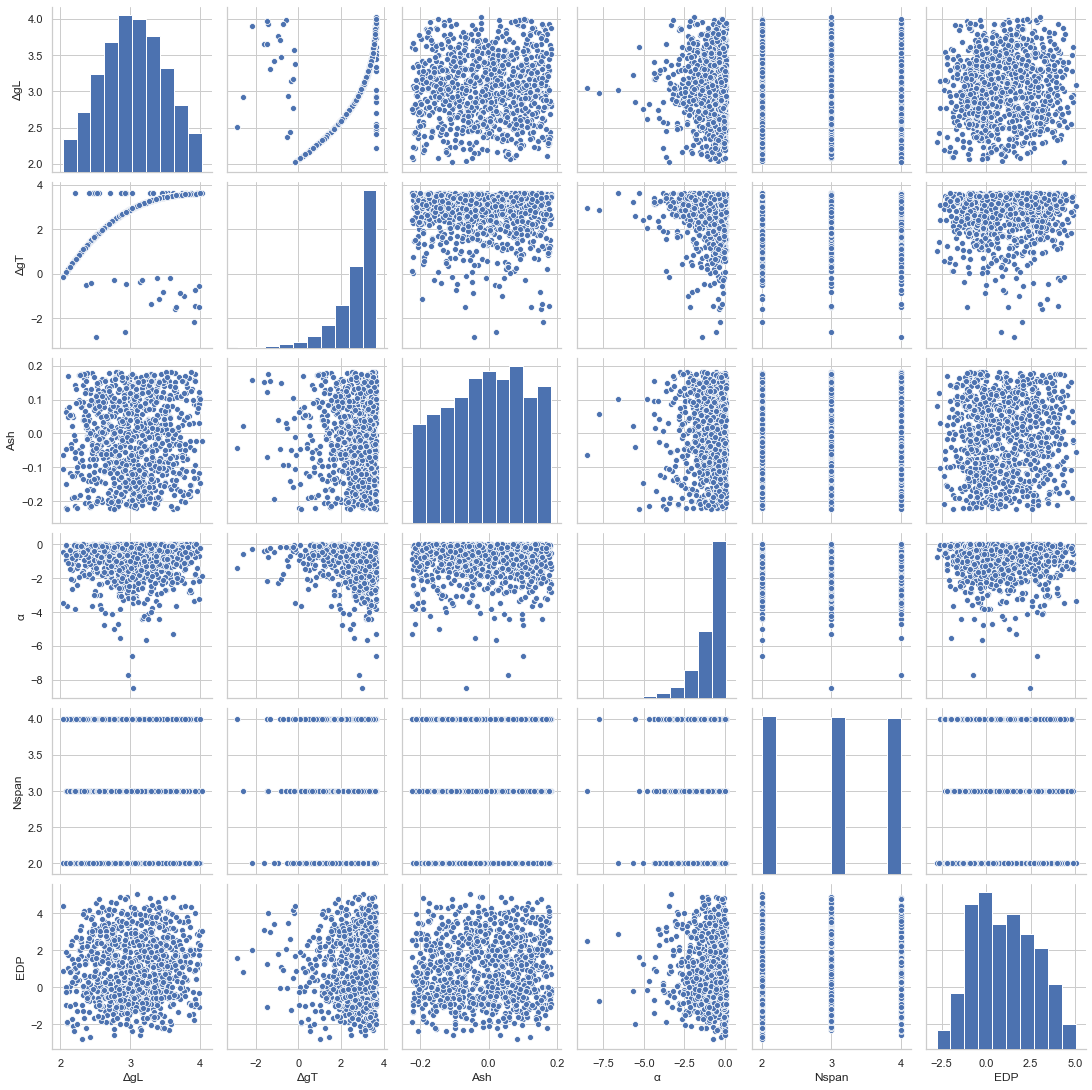

In [14]:
import seaborn as sns
quantitative_features_list1 = ['ΔgL', 'ΔgT', 'Ash', 'α', 'Nspan', 'EDP']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data)

plt.savefig('seaborn_plot5.eps',format='eps', dpi=1000)

In [15]:
X = data.loc[:, data.columns != 'EDP']
y=data['EDP']
X.head()

,Sa10,Eqdir,fc,fy,Lm,Ls2Lm,Wd,Lc,ρc,sh,...,Soil,Kb,COF,ζ,mass,ΔgL,ΔgT,Ash,α,Nspan
0,-1.768922,1,3.397886,6.134044,3.316626,-0.702407,2.990044,2.147912,-3.582916,4.333361,...,1,0.079808,-0.818986,-2.953636,-0.036358,2.429231,1.459322,-0.076926,-0.015511,2
1,-0.849313,1,3.497558,6.198634,4.099415,-0.348695,2.777936,1.724100,-4.461487,4.566129,...,2,-0.417493,-1.107551,-2.949113,0.111623,2.986170,2.866508,0.161213,-0.739437,2
2,-0.810957,2,3.465500,6.177613,3.953637,-0.045222,2.989842,2.075455,-3.665158,4.333361,...,1,-0.396074,-1.093246,-2.816803,0.114640,3.699512,3.543883,0.049158,-0.567427,2
3,-1.014436,2,3.335612,6.094850,3.933913,-0.065393,2.978069,1.665033,-3.517404,4.333361,...,2,-1.180617,-1.827693,-3.180276,0.047557,3.428410,3.397446,-0.111701,-1.305582,2
4,-1.013933,2,3.611960,6.275516,3.282610,-0.737920,2.806264,1.967175,-3.874700,4.333361,...,1,-1.111812,-1.736851,-3.035035,-0.027294,3.744077,3.559005,-0.198623,-2.010922,2


In [16]:
y.head()

0   -0.687105
1    2.862372
2    1.460567
3    1.544707
4    0.729865
Name: EDP, dtype: float64

In [17]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE) (training)':[],                     
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'Root Mean Squared Error (RMSE) (test)':[],      
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '10-Fold Cross Validation':[]})

In [18]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [19]:
import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
features = list(data.columns.values)
print(features)

['Sa10', 'Eqdir', 'fc', 'fy', 'Lm', 'Ls2Lm', 'Wd', 'Lc', 'ρc', 'sh', 'KfT', 'Akf', 'KfrT', 'Ha', 'Ka', 'Soil', 'Kb', 'COF', 'ζ', 'mass', 'ΔgL', 'ΔgT', 'Ash', 'α', 'Nspan', 'EDP']


Spliiting the data into training and test set


In [21]:
from sklearn.model_selection import train_test_split
indices = range(len(y))

X_train, X_test, y_train, y_test, indices_train,indices_test = train_test_split(X, y, indices, test_size=0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
np.savetxt('Indices_train.csv', indices_train, delimiter=',', fmt='%s')
np.savetxt('Indices_test.csv', indices_test, delimiter=',', fmt='%s')

## Linear Regression

In [23]:

complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train, y_train)

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred_tr = complex_model_1.predict(X_train)
rmse_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,pred_tr)),'.3f'))
rsq_tr  = float(format(complex_model_1.score(X_train, y_train),'.3f'))
arsq_tr = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

pred_te = complex_model_1.predict(X_test)
rmse_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_te)),'.3f'))
rsq_te  = float(format(complex_model_1.score(X_test, y_test),'.3f'))
arsq_te = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))

cv      = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','All features',rmse_tr,rsq_tr,arsq_tr,rmse_te,rsq_te,arsq_te,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

Intercept: -4.173857932114345
Coefficients: [ 7.94368875e+00 -3.88019258e-02 -6.38159984e-01  2.58194944e-01
  1.44654622e+00  5.55695983e-01  7.77753281e-02 -6.81469812e-01
 -7.25920304e-01  8.84337668e-02  3.78010275e-02 -6.97475150e-03
 -6.89769232e-02 -1.87422655e-01 -4.01966093e-02 -5.88037776e-02
 -3.40011501e-01  7.71908269e-02 -2.74521333e-01  1.60339851e-01
  1.70092324e-01  1.03818315e-01  6.66684267e-02  4.91741074e-01
  2.19978273e-02]


,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
0,Multiple Regression-1,All features,0.525,0.906,0.902,0.555,0.89,0.88,0.895


In [24]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)

np.savetxt('MLR_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('MLR_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [25]:
# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)

np.savetxt('MLR_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('MLR_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [26]:
X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)

np.savetxt('MLR_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('MLR_entire_actual.csv', y, delimiter=',', fmt='%s')

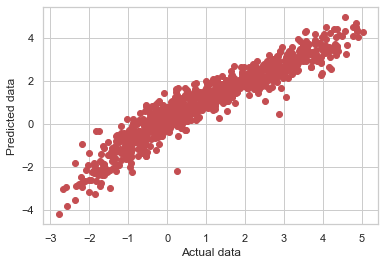

In [27]:
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

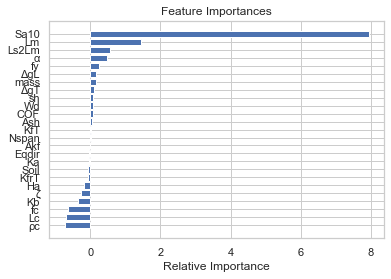

In [28]:
features = list(X.columns.values)

importances = complex_model_1.coef_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [29]:
importances

array([ 7.94368875e+00, -3.88019258e-02, -6.38159984e-01,  2.58194944e-01,
        1.44654622e+00,  5.55695983e-01,  7.77753281e-02, -6.81469812e-01,
       -7.25920304e-01,  8.84337668e-02,  3.78010275e-02, -6.97475150e-03,
       -6.89769232e-02, -1.87422655e-01, -4.01966093e-02, -5.88037776e-02,
       -3.40011501e-01,  7.71908269e-02, -2.74521333e-01,  1.60339851e-01,
        1.70092324e-01,  1.03818315e-01,  6.66684267e-02,  4.91741074e-01,
        2.19978273e-02])

## Ridge Regression

In [30]:


complex_model_R1 = linear_model.Ridge(alpha=1)
complex_model_R1.fit(X_train, y_train)

predR1_tr = complex_model_R1.predict(X_train)
rmseR1_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predR1_tr)),'.3f'))
rsqR1_tr  = float(format(complex_model_R1.score(X_train, y_train),'.3f'))
arsqR1_tr = float(format(adjustedR2(complex_model_R1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predR1_te = complex_model_R1.predict(X_test)
rmseR1_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predR1_te)),'.3f'))
rsqR1_te  = float(format(complex_model_R1.score(X_test, y_test),'.3f'))
arsqR1_te = float(format(adjustedR2(complex_model_R1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))

cvR1      = float(format(cross_val_score(complex_model_R1,X_train, y_train,cv=10).mean(),'.3f'))
#
complex_model_R2 = linear_model.Ridge(alpha=100)
complex_model_R2.fit(X_train, y_train)

predR2_tr = complex_model_R2.predict(X_train)
rmseR2_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predR2_tr)),'.3f'))
rsqR2_tr  = float(format(complex_model_R2.score(X_train, y_train),'.3f'))
arsqR2_tr = float(format(adjustedR2(complex_model_R2.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predR2_te = complex_model_R2.predict(X_test)
rmseR2_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predR2_te)),'.3f'))
rsqR2_te  = float(format(complex_model_R2.score(X_test, y_test),'.3f'))
arsqR2_te = float(format(adjustedR2(complex_model_R2.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))

cvR2     = float(format(cross_val_score(complex_model_R2,X_train, y_train,cv=10).mean(),'.3f'))
#
complex_model_R3 = linear_model.Ridge(alpha=1000)
complex_model_R3.fit(X_train, y_train)

predR3_tr = complex_model_R3.predict(X_train)
rmseR3_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predR3_tr)),'.3f'))
rsqR3_tr  = float(format(complex_model_R3.score(X_train, y_train),'.3f'))
arsqR3_tr = float(format(adjustedR2(complex_model_R3.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predR3_te = complex_model_R3.predict(X_test)
rmseR3_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predR3_te)),'.3f'))
rsqR3_te  = float(format(complex_model_R3.score(X_test, y_test),'.3f'))
arsqR3_te = float(format(adjustedR2(complex_model_R3.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))

cvR3      = float(format(cross_val_score(complex_model_R3,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r]   = ['Ridge Regression','alpha=1,    all features',rmseR1_tr,rsqR1_tr,arsqR1_tr,rmseR1_te,rsqR1_te,arsqR1_te,cvR1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100,  all features',rmseR2_tr,rsqR2_tr,arsqR2_tr,rmseR2_te,rsqR2_te,arsqR2_te,cvR2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',rmseR3_tr,rsqR3_tr,arsqR3_tr,rmseR3_te,rsqR3_te,arsqR3_te,cvR3]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
0,Multiple Regression-1,All features,0.525,0.906,0.902,0.555,0.890,0.880,0.895
1,Ridge Regression,"alpha=1, all features",0.529,0.904,0.901,0.554,0.891,0.881,0.895
2,Ridge Regression,"alpha=100, all features",1.362,0.367,0.343,1.346,0.356,0.297,0.323
3,Ridge Regression,"alpha=1000, all features",1.661,0.058,0.023,1.631,0.055,-0.033,0.040


In [31]:
# Print the predicted and actual value for the test set
Ridge_y_test_prediction= complex_model_R1.predict(X_test)

np.savetxt('Ridge_test_prediction.csv', Ridge_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('Ridge_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [32]:
# Print the predicted and actual value for the traing set
Ridge_y_train_prediction= complex_model_R1.predict(X_train)

np.savetxt('Ridge_train_prediction.csv', Ridge_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('Ridge_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [33]:
X_standardized = scaler.transform(X)
Ridge_y_pred_entire_data = complex_model_R1.predict(X_standardized)

np.savetxt('Ridge_entire_prediction.csv', Ridge_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('Ridge_entire_actual.csv', y, delimiter=',', fmt='%s')

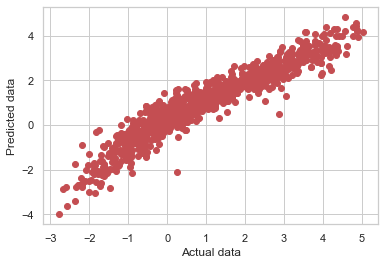

In [34]:
import matplotlib.pyplot as plt
plt.plot(y,Ridge_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

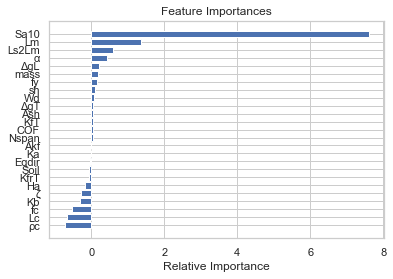

In [35]:
features = list(X.columns.values)

importances = complex_model_R1.coef_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [36]:
importances

array([ 7.61000356e+00, -4.00327667e-02, -5.35755922e-01,  1.51245062e-01,
        1.36222101e+00,  5.98060333e-01,  8.37559311e-02, -6.67975321e-01,
       -7.33098689e-01,  9.54026060e-02,  4.88219504e-02, -7.02179981e-03,
       -7.25232612e-02, -1.73348984e-01, -2.11771923e-02, -7.18681730e-02,
       -3.05848471e-01,  4.28842587e-02, -2.76921625e-01,  1.68487142e-01,
        1.97993730e-01,  5.21455042e-02,  5.09704553e-02,  4.40554229e-01,
        3.04088613e-02])

## Lasso Regression

In [37]:
complex_model_L1 = linear_model.Lasso(alpha=1)
complex_model_L1.fit(X_train, y_train)

predL1_tr = complex_model_L1.predict(X_train)
rmseL1_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predL1_tr)),'.3f'))
rsqL1_tr  = float(format(complex_model_L1.score(X_train, y_train),'.3f'))
arsqL1_tr = float(format(adjustedR2(complex_model_L1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predL1_te = complex_model_L1.predict(X_test)
rmseL1_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predL1_te)),'.3f'))
rsqL1_te  = float(format(complex_model_L1.score(X_test, y_test),'.3f'))
arsqL1_te = float(format(adjustedR2(complex_model_L1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvL1      = float(format(cross_val_score(complex_model_L1,X_train, y_train,cv=10).mean(),'.3f'))
#
complex_model_L2 = linear_model.Lasso(alpha=100)
complex_model_L2.fit(X_train, y_train)

predL2_tr = complex_model_L2.predict(X_train)
rmseL2_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predL2_tr)),'.3f'))
rsqL2_tr  = float(format(complex_model_L2.score(X_train, y_train),'.3f'))
arsqL2_tr = float(format(adjustedR2(complex_model_L2.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predL2_te = complex_model_L2.predict(X_test)
rmseL2_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predL2_te)),'.3f'))
rsqL2_te  = float(format(complex_model_L2.score(X_test, y_test),'.3f'))
arsqL2_te = float(format(adjustedR2(complex_model_L2.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvL2      = float(format(cross_val_score(complex_model_L2,X_train, y_train,cv=10).mean(),'.3f'))
#
complex_model_L3 = linear_model.Lasso(alpha=1000)
complex_model_L3.fit(X_train, y_train)

predL3_tr = complex_model_L3.predict(X_train)
rmseL3_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predL3_tr)),'.3f'))
rsqL3_tr  = float(format(complex_model_L3.score(X_train, y_train),'.3f'))
arsqL3_tr = float(format(adjustedR2(complex_model_L3.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predL3_te = complex_model_L3.predict(X_test)
rmseL3_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predL3_te)),'.3f'))
rsqL3_te  = float(format(complex_model_L3.score(X_test, y_test),'.3f'))
arsqL3_te = float(format(adjustedR2(complex_model_L3.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvL3      = float(format(cross_val_score(complex_model_L3,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r]   = ['Lasso Regression','alpha=1, all features',   rmseL1_tr,rsqL1_tr,arsqL1_tr,rmseL1_te,rsqL1_te,arsqL1_te,cvL1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features', rmseL2_tr,rsqL2_tr,arsqL2_tr,rmseL2_te,rsqL2_te,arsqL2_te,cvL2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmseL3_tr,rsqL3_tr,arsqL3_tr,rmseL3_te,rsqL3_te,arsqL3_te,cvL3]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
0,Multiple Regression-1,All features,0.525,0.906,0.902,0.555,0.890,0.880,0.895
1,Ridge Regression,"alpha=1, all features",0.529,0.904,0.901,0.554,0.891,0.881,0.895
2,Ridge Regression,"alpha=100, all features",1.362,0.367,0.343,1.346,0.356,0.297,0.323
3,Ridge Regression,"alpha=1000, all features",1.661,0.058,0.023,1.631,0.055,-0.033,0.040
4,Lasso Regression,"alpha=1, all features",1.711,0.000,-0.038,1.678,-0.001,-0.093,-0.010
5,Lasso Regression,"alpha=100, all features",1.711,0.000,-0.038,1.678,-0.001,-0.093,-0.010
6,Lasso Regression,"alpha=1000, all features",1.711,0.000,-0.038,1.678,-0.001,-0.093,-0.010


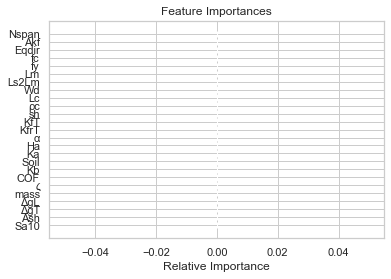

In [38]:
features = list(X.columns.values)

importances = complex_model_L1.coef_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [39]:
importances


array([ 0., -0., -0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,
       -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [40]:
# evaluation_poly = pd.DataFrame({'Model': [],
#                                 'Details':[],
#                                 'Root Mean Squared Error (RMSE)':[],
#                                 'R-squared (training)':[],
#                                 'Adjusted R-squared (training)':[],
#                                 'R-squared (test)':[],
#                                 'Adjusted R-squared (test)':[],
#                                 '5-Fold Cross Validation':[]})



# polyfeat = PolynomialFeatures(degree=2)
# X_allpoly = polyfeat.fit_transform(data[features])
# X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
# X_testpoly = polyfeat.fit_transform(test_data_dm[features])
# poly = linear_model.LinearRegression().fit(X_trainpoly, train_data_dm['τmax'])

# pred5 = poly.predict(X_testpoly)
# rmsepoly5 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['τmax'],pred5)),'.3f'))
# rtrpoly5 = float(format(poly.score(X_trainpoly,train_data_dm['τmax']),'.3f'))
# rtepoly5 = float(format(poly.score(X_testpoly,test_data_dm['τmax']),'.3f'))
# cv5 = float(format(cross_val_score(linear_model.LinearRegression(),X_trainpoly,train_data_dm['τmax'],cv=5).mean(),'.3f'))

# polyfeat = PolynomialFeatures(degree=2)
# X_allpoly = polyfeat.fit_transform(data[features])
# X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
# X_testpoly = polyfeat.fit_transform(test_data_dm[features])
# poly = linear_model.Ridge(alpha=1).fit(X_trainpoly, train_data_dm['τmax'])

# pred6 = poly.predict(X_testpoly)
# rmsepoly6 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['τmax'],pred6)),'.3f'))
# rtrpoly6 = float(format(poly.score(X_trainpoly,train_data_dm['τmax']),'.3f'))
# rtepoly6 = float(format(poly.score(X_testpoly,test_data_dm['τmax']),'.3f'))
# cv6 = float(format(cross_val_score(linear_model.Ridge(alpha=1),X_trainpoly,train_data_dm['τmax'],cv=5).mean(),'.3f'))

# polyfeat = PolynomialFeatures(degree=2)
# X_allpoly = polyfeat.fit_transform(data[features])
# X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
# X_testpoly = polyfeat.fit_transform(test_data_dm[features])
# poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data_dm['τmax'])

# pred7 = poly.predict(X_testpoly)
# rmsepoly7 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['τmax'],pred7)),'.3f'))
# rtrpoly7 = float(format(poly.score(X_trainpoly,train_data_dm['τmax']),'.3f'))
# rtepoly7 = float(format(poly.score(X_testpoly,test_data_dm['τmax']),'.3f'))
# cv7 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_trainpoly,train_data_dm['τmax'],cv=5).mean(),'.3f'))

# polyfeat = PolynomialFeatures(degree=2)
# X_allpoly = polyfeat.fit_transform(data[features])
# X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
# X_testpoly = polyfeat.fit_transform(test_data_dm[features])
# poly = linear_model.Lasso(alpha=1).fit(X_trainpoly, train_data_dm['τmax'])

# pred8 = poly.predict(X_testpoly)
# rmsepoly8 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['τmax'],pred8)),'.3f'))
# rtrpoly8 = float(format(poly.score(X_trainpoly,train_data_dm['τmax']),'.3f'))
# rtepoly8 = float(format(poly.score(X_testpoly,test_data_dm['τmax']),'.3f'))
# cv8 = float(format(cross_val_score(linear_model.Lasso(alpha=1),X_trainpoly,train_data_dm['τmax'],cv=5).mean(),'.3f'))

# polyfeat = PolynomialFeatures(degree=2)
# X_allpoly = polyfeat.fit_transform(data[features])
# X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
# X_testpoly = polyfeat.fit_transform(test_data_dm[features])
# poly = linear_model.Lasso(alpha=50000).fit(X_trainpoly, train_data_dm['τmax'])

# pred9 = poly.predict(X_testpoly)
# rmsepoly9 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['τmax'],pred9)),'.3f'))
# rtrpoly9 = float(format(poly.score(X_trainpoly,train_data_dm['τmax']),'.3f'))
# rtepoly9 = float(format(poly.score(X_testpoly,test_data_dm['τmax']),'.3f'))
# cv9 = float(format((linear_model.Lasso(alpha=50000),X_trainpoly,train_data_dm['τmax'],cv=10).mean(),'.3f'))

# r = evaluation_poly.shape[0]


# evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=2, all features',rmsepoly5,rtrpoly5,'-',rtepoly5,'-',cv5]
# evaluation_poly.loc[r+2] = ['Polynomial Ridge Regression','alpha=1, degree=2, all features',rmsepoly6,rtrpoly6,'-',rtepoly6,'-',cv6]
# evaluation_poly.loc[r+3] = ['Polynomial Ridge Regression','alpha=50000, degree=2, all features',rmsepoly7,rtrpoly7,'-',rtepoly7,'-',cv7]
# evaluation_poly.loc[r+4] = ['Polynomial Lasso Regression','alpha=1, degree=2, all features',rmsepoly8,rtrpoly8,'-',rtepoly8,'-',cv8]
# evaluation_poly.loc[r+5] = ['Polynomial Lasso Regression','alpha=50000, degree=2, all features',rmsepoly9,rtrpoly9,'-',rtepoly9,'-',cv9]
# evaluation_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
# evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

## K- nearest Neighbors

In [41]:
knnreg1 = KNeighborsRegressor(n_neighbors=15)
knnreg1.fit(X_train, y_train)

predKNN1_tr = knnreg1.predict(X_train)
rmseKNN1_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predKNN1_tr)),'.3f'))
rsqKNN1_tr  = float(format(knnreg1.score(X_train, y_train),'.3f'))
arsqKNN1_tr = float(format(adjustedR2(knnreg1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predKNN1_te = knnreg1.predict(X_test)
rmseKNN1_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predKNN1_te)),'.3f'))
rsqKNN1_te  = float(format(knnreg1.score(X_test, y_test),'.3f'))
arsqKNN1_te = float(format(adjustedR2(knnreg1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvKNN1      = float(format(cross_val_score(knnreg1,X_train, y_train,cv=10).mean(),'.3f'))
#
knnreg2 = KNeighborsRegressor(n_neighbors=25)
knnreg2.fit(X_train, y_train)

predKNN2_tr = knnreg2.predict(X_train)
rmseKNN2_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predKNN2_tr)),'.3f'))
rsqKNN2_tr  = float(format(knnreg2.score(X_train, y_train),'.3f'))
arsqKNN2_tr = float(format(adjustedR2(knnreg2.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predKNN2_te = knnreg2.predict(X_test)
rmseKNN2_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predKNN2_te)),'.3f'))
rsqKNN2_te  = float(format(knnreg2.score(X_test, y_test),'.3f'))
arsqKNN2_te = float(format(adjustedR2(knnreg2.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvKNN2      = float(format(cross_val_score(knnreg2,X_train, y_train,cv=10).mean(),'.3f'))
#
knnreg3 = KNeighborsRegressor(n_neighbors=27)
knnreg3.fit(X_train, y_train)

predKNN3_tr = knnreg3.predict(X_train)
rmseKNN3_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predKNN3_tr)),'.3f'))
rsqKNN3_tr  = float(format(knnreg3.score(X_train, y_train),'.3f'))
arsqKNN3_tr = float(format(adjustedR2(knnreg3.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predKNN3_te    = knnreg3.predict(X_test)
rmseKNN3_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predKNN3_te)),'.3f'))
rsqKNN3_te  = float(format(knnreg3.score(X_test, y_test),'.3f'))
arsqKNN3_te = float(format(adjustedR2(knnreg3.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvKNN3         = float(format(cross_val_score(knnreg3,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r]   = ['KNN Regression','k=15, all features',rmseKNN1_tr,rsqKNN1_tr,arsqKNN1_tr,rmseKNN1_te,rsqKNN1_te,arsqKNN1_te,cvKNN1]
evaluation.loc[r+1] = ['KNN Regression','k=25, all features',rmseKNN2_tr,rsqKNN2_tr,arsqKNN2_tr,rmseKNN2_te,rsqKNN2_te,arsqKNN2_te,cvKNN2]
evaluation.loc[r+2] = ['KNN Regression','k=27, all features',rmseKNN3_tr,rsqKNN3_tr,arsqKNN3_tr,rmseKNN3_te,rsqKNN3_te,arsqKNN3_te,cvKNN3]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
0,Multiple Regression-1,All features,0.525,0.906,0.902,0.555,0.890,0.880,0.895
1,Ridge Regression,"alpha=1, all features",0.529,0.904,0.901,0.554,0.891,0.881,0.895
2,Ridge Regression,"alpha=100, all features",1.362,0.367,0.343,1.346,0.356,0.297,0.323
8,KNN Regression,"k=25, all features",1.376,0.354,0.329,1.386,0.317,0.254,0.294
7,KNN Regression,"k=15, all features",1.338,0.388,0.365,1.372,0.331,0.269,0.289
9,KNN Regression,"k=27, all features",1.382,0.348,0.323,1.386,0.317,0.254,0.287
3,Ridge Regression,"alpha=1000, all features",1.661,0.058,0.023,1.631,0.055,-0.033,0.040
4,Lasso Regression,"alpha=1, all features",1.711,0.000,-0.038,1.678,-0.001,-0.093,-0.010
5,Lasso Regression,"alpha=100, all features",1.711,0.000,-0.038,1.678,-0.001,-0.093,-0.010
6,Lasso Regression,"alpha=1000, all features",1.711,0.000,-0.038,1.678,-0.001,-0.093,-0.010


## Support Vector Regression

In [42]:
from sklearn.svm import SVR
SVR_model=SVR(kernel='linear', C=1e2, degree=5)

SVR_model.fit(X_train, y_train)

predSVR_tr = SVR_model.predict(X_train)
rmseSVR_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predSVR_tr)),'.3f'))
rsqSVR_tr  = float(format(SVR_model.score(X_train, y_train),'.3f'))
arsqSVR_tr = float(format(adjustedR2(SVR_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predSVR_te = SVR_model.predict(X_test)
rmseSVR_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predSVR_te)),'.3f'))
rsqSVR_te  = float(format(SVR_model.score(X_test, y_test),'.3f'))
arsqSVR_te = float(format(adjustedR2(SVR_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))

cvSVR      = float(format(cross_val_score(SVR_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Support Vector Reg','All features',rmseSVR_tr,rsqSVR_tr,arsqSVR_tr,rmseSVR_te,rsqSVR_te,arsqSVR_te,cvSVR]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)


,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
0,Multiple Regression-1,All features,0.525,0.906,0.902,0.555,0.890,0.880,0.895
1,Ridge Regression,"alpha=1, all features",0.529,0.904,0.901,0.554,0.891,0.881,0.895
10,Support Vector Reg,All features,0.532,0.903,0.900,0.554,0.891,0.881,0.895
2,Ridge Regression,"alpha=100, all features",1.362,0.367,0.343,1.346,0.356,0.297,0.323
8,KNN Regression,"k=25, all features",1.376,0.354,0.329,1.386,0.317,0.254,0.294
7,KNN Regression,"k=15, all features",1.338,0.388,0.365,1.372,0.331,0.269,0.289
9,KNN Regression,"k=27, all features",1.382,0.348,0.323,1.386,0.317,0.254,0.287
3,Ridge Regression,"alpha=1000, all features",1.661,0.058,0.023,1.631,0.055,-0.033,0.040
4,Lasso Regression,"alpha=1, all features",1.711,0.000,-0.038,1.678,-0.001,-0.093,-0.010
5,Lasso Regression,"alpha=100, all features",1.711,0.000,-0.038,1.678,-0.001,-0.093,-0.010


## Decision Tree Regression

In [43]:
    
from sklearn.tree import DecisionTreeRegressor
DT_model= DecisionTreeRegressor(random_state=0)

DT_model.fit(X_train, y_train)

predDT_tr = DT_model.predict(X_train)
rmseDT_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predDT_tr)),'.3f'))
rsqDT_tr  = float(format(DT_model.score(X_train, y_train),'.3f'))
arsqDT_tr = float(format(adjustedR2(DT_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predDT_te = DT_model.predict(X_test)
rmseDT_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predDT_te)),'.3f'))
rsqDT_te  = float(format(DT_model.score(X_test, y_test),'.3f'))
arsqDT_te = float(format(adjustedR2(DT_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvDT      = float(format(cross_val_score(DT_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree','All features',rmseDT_tr,rsqDT_tr,arsqDT_tr,rmseDT_te,rsqDT_te,arsqDT_te,cvDT]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)   

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
0,Multiple Regression-1,All features,0.525,0.906,0.902,0.555,0.890,0.880,0.895
1,Ridge Regression,"alpha=1, all features",0.529,0.904,0.901,0.554,0.891,0.881,0.895
10,Support Vector Reg,All features,0.532,0.903,0.900,0.554,0.891,0.881,0.895
11,Decision Tree,All features,0.000,1.000,1.000,0.797,0.774,0.753,0.800
2,Ridge Regression,"alpha=100, all features",1.362,0.367,0.343,1.346,0.356,0.297,0.323
8,KNN Regression,"k=25, all features",1.376,0.354,0.329,1.386,0.317,0.254,0.294
7,KNN Regression,"k=15, all features",1.338,0.388,0.365,1.372,0.331,0.269,0.289
9,KNN Regression,"k=27, all features",1.382,0.348,0.323,1.386,0.317,0.254,0.287
3,Ridge Regression,"alpha=1000, all features",1.661,0.058,0.023,1.631,0.055,-0.033,0.040
4,Lasso Regression,"alpha=1, all features",1.711,0.000,-0.038,1.678,-0.001,-0.093,-0.010


In [44]:
# Print the predicted and actual value for the test set
DT_y_test_prediction= DT_model.predict(X_test)

np.savetxt('DT_test_prediction.csv', DT_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('DT_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [45]:
# Print the predicted and actual value for the traing set
DT_y_train_prediction= DT_model.predict(X_train)

np.savetxt('DT_train_prediction.csv', DT_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('DT_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [46]:
X_standardized = scaler.transform(X)
DT_y_pred_entire_data = DT_model.predict(X_standardized)

np.savetxt('DT_entire_prediction.csv', DT_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('DT_entire_actual.csv', y, delimiter=',', fmt='%s')

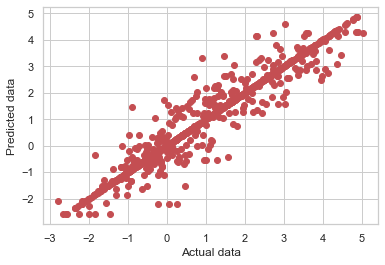

In [47]:
import matplotlib.pyplot as plt
plt.plot(y, DT_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

## Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor
RF_model= RandomForestRegressor(random_state=0)

RF_model.fit(X_train, y_train)

predRF_tr = RF_model.predict(X_train)
rmseRF_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predRF_tr)),'.3f'))
rsqRF_tr  = float(format(RF_model.score(X_train, y_train),'.3f'))
arsqRF_tr = float(format(adjustedR2(RF_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predRF_te = RF_model.predict(X_test)
rmseRF_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predRF_te)),'.3f'))
rsqRF_te  = float(format(RF_model.score(X_test, y_test),'.3f'))
arsqRF_te = float(format(adjustedR2(RF_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvRF      = float(format(cross_val_score(RF_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest','All features',rmseRF_tr,rsqRF_tr,arsqRF_tr,rmseRF_te,rsqRF_te,arsqRF_te,cvRF]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
12,Random Forest,All features,0.201,0.986,0.986,0.526,0.902,0.893,0.896
0,Multiple Regression-1,All features,0.525,0.906,0.902,0.555,0.890,0.880,0.895
1,Ridge Regression,"alpha=1, all features",0.529,0.904,0.901,0.554,0.891,0.881,0.895
10,Support Vector Reg,All features,0.532,0.903,0.900,0.554,0.891,0.881,0.895
11,Decision Tree,All features,0.000,1.000,1.000,0.797,0.774,0.753,0.800
2,Ridge Regression,"alpha=100, all features",1.362,0.367,0.343,1.346,0.356,0.297,0.323
8,KNN Regression,"k=25, all features",1.376,0.354,0.329,1.386,0.317,0.254,0.294
7,KNN Regression,"k=15, all features",1.338,0.388,0.365,1.372,0.331,0.269,0.289
9,KNN Regression,"k=27, all features",1.382,0.348,0.323,1.386,0.317,0.254,0.287
3,Ridge Regression,"alpha=1000, all features",1.661,0.058,0.023,1.631,0.055,-0.033,0.040


In [49]:
# Print the predicted and actual value for the test set
RF_y_test_prediction= RF_model.predict(X_test)

np.savetxt('RF_test_prediction.csv', RF_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('RF_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [50]:
# Print the predicted and actual value for the traing set
RF_y_train_prediction= RF_model.predict(X_train)

np.savetxt('RF_train_prediction.csv', RF_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('RF_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [51]:
X_standardized = scaler.transform(X)
RF_y_pred_entire_data = RF_model.predict(X_standardized)

np.savetxt('RF_entire_prediction.csv', RF_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('RF_entire_actual.csv', y, delimiter=',', fmt='%s')

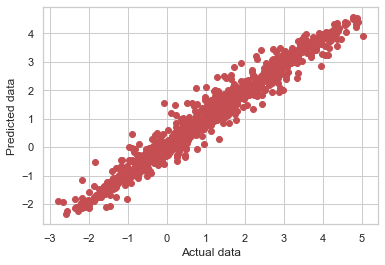

In [52]:
import matplotlib.pyplot as plt
plt.plot(y, RF_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

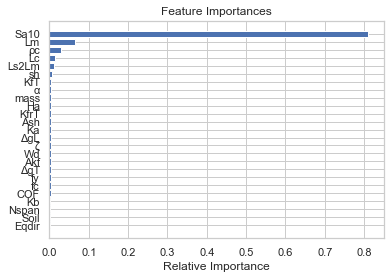

In [53]:
features = list(X.columns.values)

importances = RF_model.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [54]:
importances

array([8.10486386e-01, 3.68163568e-04, 2.98286208e-03, 3.33168998e-03,
       6.60378642e-02, 1.13510622e-02, 3.64878739e-03, 1.46943773e-02,
       3.02999928e-02, 5.62481363e-03, 4.69184976e-03, 3.44292099e-03,
       4.07395040e-03, 4.29215165e-03, 3.92538969e-03, 4.20651586e-04,
       2.38041743e-03, 2.70824798e-03, 3.81695900e-03, 4.66980802e-03,
       3.82129453e-03, 3.33406274e-03, 3.99993620e-03, 4.67942152e-03,
       9.16939362e-04])

In [55]:


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 325 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   24.2s finished


{'n_estimators': 178,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

## Random Forest with Optimal Parameter

In [56]:
from sklearn.ensemble import RandomForestRegressor
RF_model_opt= RandomForestRegressor(n_estimators= 136, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto',  bootstrap= 'True')

RF_model_opt.fit(X_train, y_train)

# knnreg.fit(X_train, y_train)
# pred = complex_model_1.predict(X_test)
# rmsecm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))
# rtrcm = float(format(complex_model_1.score(X_train, y_train),'.3f'))
# artrcm = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
# rtecm = float(format(complex_model_1.score(X_test, y_test),'.3f'))
# artecm = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
# cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

predRFo_tr = RF_model_opt.predict(X_train)
rmseRFo_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predRFo_tr)),'.3f'))
rsqRFo_tr  = float(format(RF_model_opt.score(X_train, y_train),'.3f'))
arsqRFo_tr = float(format(adjustedR2(RF_model_opt.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predRFo_te = RF_model_opt.predict(X_test)
rmseRFo_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predRFo_te)),'.3f'))
rsqRFo_te  = float(format(RF_model_opt.score(X_test, y_test),'.3f'))
arsqRFo_te = float(format(adjustedR2(RF_model_opt.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvRFo      = float(format(cross_val_score(RF_model_opt,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest - opt','All features',rmseRFo_tr,rsqRFo_tr,arsqRFo_tr,rmseRFo_te,rsqRFo_te,arsqRFo_te,cvRFo]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
13,Random Forest - opt,All features,0.202,0.986,0.986,0.536,0.898,0.888,0.897
12,Random Forest,All features,0.201,0.986,0.986,0.526,0.902,0.893,0.896
0,Multiple Regression-1,All features,0.525,0.906,0.902,0.555,0.890,0.880,0.895
1,Ridge Regression,"alpha=1, all features",0.529,0.904,0.901,0.554,0.891,0.881,0.895
10,Support Vector Reg,All features,0.532,0.903,0.900,0.554,0.891,0.881,0.895
11,Decision Tree,All features,0.000,1.000,1.000,0.797,0.774,0.753,0.800
2,Ridge Regression,"alpha=100, all features",1.362,0.367,0.343,1.346,0.356,0.297,0.323
8,KNN Regression,"k=25, all features",1.376,0.354,0.329,1.386,0.317,0.254,0.294
7,KNN Regression,"k=15, all features",1.338,0.388,0.365,1.372,0.331,0.269,0.289
9,KNN Regression,"k=27, all features",1.382,0.348,0.323,1.386,0.317,0.254,0.287


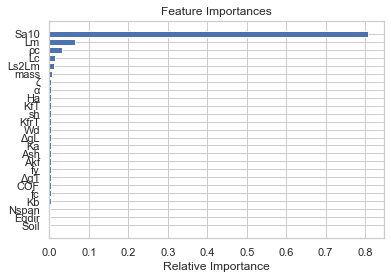

In [57]:
features = list(X.columns.values)

importances = RF_model_opt.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [58]:
importances

array([8.08078961e-01, 4.57487960e-04, 3.14332302e-03, 3.23793066e-03,
       6.58757275e-02, 1.10217472e-02, 3.78906332e-03, 1.41647845e-02,
       3.28671324e-02, 4.51697218e-03, 4.53166136e-03, 3.54441142e-03,
       4.02837696e-03, 4.64420307e-03, 3.61124648e-03, 4.03653693e-04,
       2.97148743e-03, 3.19062982e-03, 4.71677893e-03, 5.23432203e-03,
       3.67196993e-03, 3.20038619e-03, 3.60698581e-03, 4.70962432e-03,
       7.81132498e-04])

## XG Boost Regression

In [59]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import xgboost as xgb
from xgboost import plot_importance
XGB_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

XGB_model.fit(X_train, y_train)

predXGB_tr = XGB_model.predict(X_train)
rmseXGB_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predXGB_tr)),'.3f'))
rsqXGB_tr  = float(format(XGB_model.score(X_train, y_train),'.3f'))
arsqXGB_tr = float(format(adjustedR2(XGB_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predXGB_te = XGB_model.predict(X_test)
rmseXGB_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predXGB_te)),'.3f'))
rsqXGB_te  = float(format(XGB_model.score(X_test, y_test),'.3f'))
arsqXGB_te = float(format(adjustedR2(XGB_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvXGB      = float(format(cross_val_score(XGB_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['XG Boost','All features',rmseXGB_tr,rsqXGB_tr,arsqXGB_tr,rmseXGB_te,rsqXGB_te,arsqXGB_te,cvXGB]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
14,XG Boost,All features,0.043,0.999,0.999,0.522,0.903,0.894,0.904
13,Random Forest - opt,All features,0.202,0.986,0.986,0.536,0.898,0.888,0.897
12,Random Forest,All features,0.201,0.986,0.986,0.526,0.902,0.893,0.896
0,Multiple Regression-1,All features,0.525,0.906,0.902,0.555,0.890,0.880,0.895
1,Ridge Regression,"alpha=1, all features",0.529,0.904,0.901,0.554,0.891,0.881,0.895
10,Support Vector Reg,All features,0.532,0.903,0.900,0.554,0.891,0.881,0.895
11,Decision Tree,All features,0.000,1.000,1.000,0.797,0.774,0.753,0.800
2,Ridge Regression,"alpha=100, all features",1.362,0.367,0.343,1.346,0.356,0.297,0.323
8,KNN Regression,"k=25, all features",1.376,0.354,0.329,1.386,0.317,0.254,0.294
7,KNN Regression,"k=15, all features",1.338,0.388,0.365,1.372,0.331,0.269,0.289


In [60]:
# Print the predicted and actual value for the test set
XG_y_test_prediction= XGB_model.predict(X_test)

np.savetxt('XG_test_prediction.csv', XG_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('XG_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [61]:
# Print the predicted and actual value for the traing set
XG_y_train_prediction= XGB_model.predict(X_train)

np.savetxt('XG_train_prediction.csv', XG_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('XG_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [62]:
X_standardized = scaler.transform(X)
XG_y_pred_entire_data = XGB_model.predict(X_standardized)

np.savetxt('XG_entire_prediction.csv', XG_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('XG_entire_actual.csv', y, delimiter=',', fmt='%s')

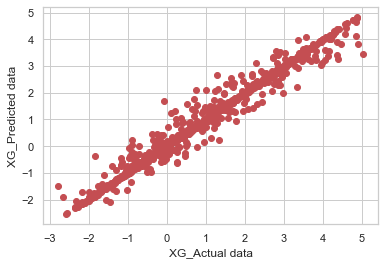

In [63]:
import matplotlib.pyplot as plt
plt.plot(y, XG_y_pred_entire_data,  'ro')
plt.ylabel('XG_Predicted data')
plt.xlabel('XG_Actual data')
plt.show()

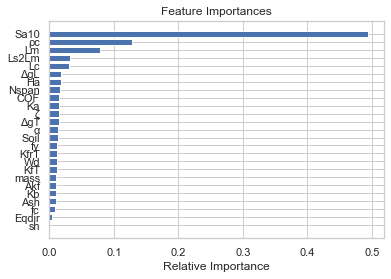

In [64]:
#XGB_model.feature_importances_
features = list(X.columns.values)

importances = XGB_model.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [65]:
importances

array([0.4945017 , 0.00391005, 0.0093322 , 0.01216042, 0.07901004,
       0.03144148, 0.01189663, 0.03028965, 0.12726213, 0.        ,
       0.01166634, 0.00973445, 0.0119645 , 0.01770478, 0.01481549,
       0.0128218 , 0.00964927, 0.01555598, 0.01450298, 0.01087064,
       0.01784438, 0.01409546, 0.00953458, 0.01329202, 0.01614305],
      dtype=float32)

### Optimal parameter for XGBOOST

In [66]:
# #for tuning parameters
# #from sklearn.grid_search import GridSearchCV   #Performing grid search
# from sklearn.model_selection import GridSearchCV

# parameters_for_testing = {
#     'colsample_bytree':[0.4,0.6,0.8],
#     'gamma':[0,0.03,0.1,0.3],
#     'min_child_weight':[1.5,6,10],
#     'learning_rate':[0.1,0.07],
#     'max_depth':[3,5],
#     'n_estimators':[10000],
#     'reg_alpha':[1e-5, 1e-2,  0.75],
#     'reg_lambda':[1e-5, 1e-2, 0.45],
#     'subsample':[0.6,0.95]  
# }

                    
# xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

# gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
# gsearch1.fit(train_data_dm[features],train_data_dm['τmax'])
# print (gsearch1.grid_scores_)
# print('best params')
# print (gsearch1.best_params_)
# print('best score')
# print (gsearch1.best_score_)#for tuning parameters
# parameters_for_testing = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  
# }

                    
# xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

# gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
# gsearch1.fit(train_x,train_y)
# print (gsearch1.grid_scores_)
# print('best params')
# print (gsearch1.best_params_)
# print('best score')
# print (gsearch1.best_score_)

## ADABOOST REGRESSION

In [67]:

from sklearn.ensemble import AdaBoostRegressor


ADB_model = AdaBoostRegressor(random_state=0, n_estimators=100)
ADB_model.fit(X_train, y_train)

predADB_tr = ADB_model.predict(X_train)
rmseADB_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predADB_tr)),'.3f'))
rsqADB_tr  = float(format(ADB_model.score(X_train, y_train),'.3f'))
arsqADB_tr = float(format(adjustedR2(ADB_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predADB_te = ADB_model.predict(X_test)
rmseADB_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predADB_te)),'.3f'))
rsqADB_te  = float(format(ADB_model.score(X_test, y_test),'.3f'))
arsqADB_te = float(format(adjustedR2(ADB_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvADB      = float(format(cross_val_score(ADB_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoost','All features',rmseADB_tr,rsqADB_tr,arsqADB_tr,rmseADB_te,rsqADB_te,arsqADB_te,cvADB]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)


,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
14,XG Boost,All features,0.043,0.999,0.999,0.522,0.903,0.894,0.904
13,Random Forest - opt,All features,0.202,0.986,0.986,0.536,0.898,0.888,0.897
12,Random Forest,All features,0.201,0.986,0.986,0.526,0.902,0.893,0.896
0,Multiple Regression-1,All features,0.525,0.906,0.902,0.555,0.890,0.880,0.895
1,Ridge Regression,"alpha=1, all features",0.529,0.904,0.901,0.554,0.891,0.881,0.895
10,Support Vector Reg,All features,0.532,0.903,0.900,0.554,0.891,0.881,0.895
15,AdaBoost,All features,0.489,0.918,0.915,0.628,0.860,0.847,0.873
11,Decision Tree,All features,0.000,1.000,1.000,0.797,0.774,0.753,0.800
2,Ridge Regression,"alpha=100, all features",1.362,0.367,0.343,1.346,0.356,0.297,0.323
8,KNN Regression,"k=25, all features",1.376,0.354,0.329,1.386,0.317,0.254,0.294


In [68]:
# Print the predicted and actual value for the test set
AD_y_test_prediction= ADB_model.predict(X_test)

np.savetxt('AD_test_prediction.csv', AD_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('AD_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [69]:
# Print the predicted and actual value for the traing set
AD_y_train_prediction= ADB_model.predict(X_train)

np.savetxt('AD_train_prediction.csv', AD_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('AD_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [70]:
X_standardized = scaler.transform(X)
AD_y_pred_entire_data = ADB_model.predict(X_standardized)

np.savetxt('AD_entire_prediction.csv', AD_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('AD_entire_actual.csv', y, delimiter=',', fmt='%s')

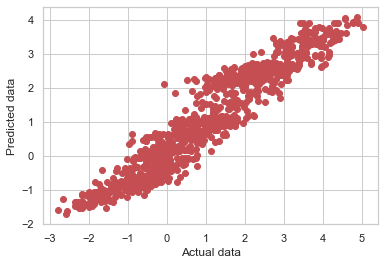

In [71]:
import matplotlib.pyplot as plt
plt.plot(y, AD_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

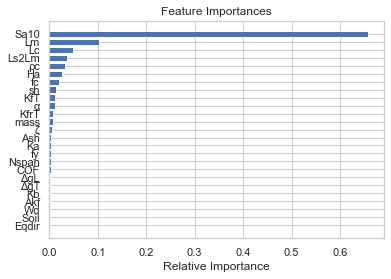

In [72]:
features = list(X.columns.values)

importances = ADB_model.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [73]:
importances

array([6.58659529e-01, 0.00000000e+00, 1.90996122e-02, 3.24018350e-03,
       1.01893839e-01, 3.57954695e-02, 8.83914902e-05, 4.91727766e-02,
       3.15959890e-02, 1.26949930e-02, 1.23523500e-02, 5.12822230e-04,
       8.09423848e-03, 2.49810280e-02, 3.37049674e-03, 0.00000000e+00,
       1.56139594e-03, 2.37676463e-03, 4.85361011e-03, 7.09803412e-03,
       1.98078320e-03, 1.82323771e-03, 4.23137770e-03, 1.20319309e-02,
       2.49114722e-03])

## From the models, XGBOOST is the one having highest accuracy